In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("25152746-spam.tsv",sep='\t')

In [5]:
df.head(5)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [6]:
df.isna()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [8]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

We see that there is imbalance in the data.

In [13]:
ham= df[df['label']=='ham']
spam = df[df['label']=='spam']

In [14]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [18]:
ham=ham.sample(len(spam))

In [19]:
ham.shape

(747, 4)

In [24]:
data= ham.append(spam,ignore_index=True)

<ipython-input-24-45858f8cc360>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data= ham.append(spam,ignore_index=True)


In [25]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [26]:
data.head()

,label,message,length,punct
0,ham,"Sorry, I'll call later",22,2
1,ham,HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYARO...,119,4
2,ham,No pic. Please re-send.,23,3
3,ham,"Hi, wkend ok but journey terrible. Wk not good...",85,2
4,ham,No go. No openings for that room 'til after th...,77,3


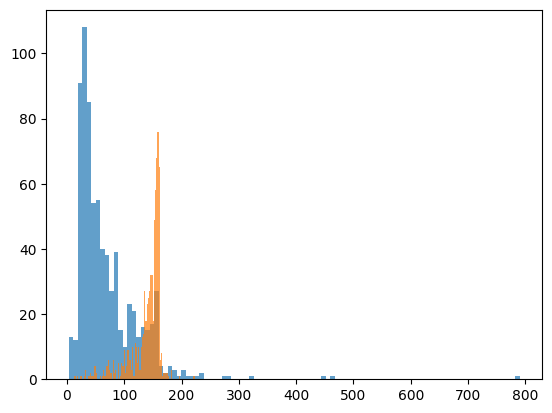

In [30]:
plt.hist(data[data['label']=='ham']['length'], bins = 100 , alpha =0.7)

plt.hist(data[data['label']=='spam']['length'], bins = 100 , alpha =0.7)
plt.show()

Split train test

In [31]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test= train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True)

In [38]:
X_train.shape


(1045,)

In [39]:
X_test.shape

(449,)

In [40]:
X_train

1438      You have 1 new message. Please call 08715205273
431     Yo dude guess who just got arrested the other day
194     Yoyyooo u know how to change permissions for a...
240     ok. I am a gentleman and will treat you with d...
1309    Had your mobile 11 months or more? U R entitle...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559                              Oh sorry please its over
684     That's cool he'll be here all night, lemme kno...
Name: message, Length: 1045, dtype: object

RANDOM FOREST

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [85]:
classifier = Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators=10))])

In [86]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [87]:
y_pred=classifier.predict(X_test)

In [51]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'ham', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
        'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 

In [52]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [53]:
accuracy_score(y_test,y_pred)

0.9175946547884187

In [55]:
classifier.score(X_test,y_test)

0.9175946547884187

In [56]:
cm=confusion_matrix(y_test,y_pred)

In [57]:
cm

array([[222,   5],
       [ 32, 190]])

Text(50.722222222222214, 0.5, 'Truth')

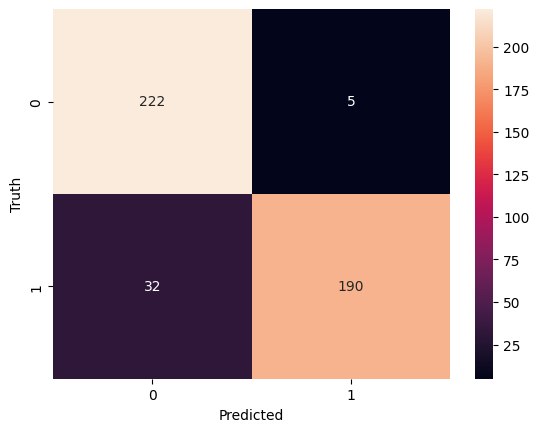

In [65]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.98      0.92       227
        spam       0.97      0.86      0.91       222

    accuracy                           0.92       449
   macro avg       0.92      0.92      0.92       449
weighted avg       0.92      0.92      0.92       449



SUPPORT VECTOR MACHINE


In [69]:
from sklearn.svm import SVC

In [74]:
svm= Pipeline([("tfidf", TfidfVectorizer()),("classifier",SVC(C=100,gamma='auto'))])

In [76]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [77]:
y_pred=svm.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred)

0.9576837416481069

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       227
        spam       0.99      0.93      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [82]:
svmcm= confusion_matrix(y_test,y_pred)

<Axes: >

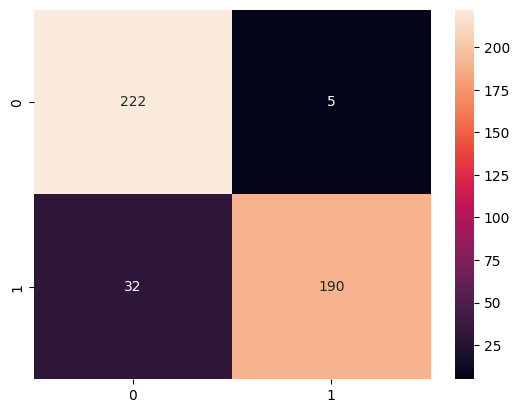

In [83]:
sn.heatmap(cm,annot=True,fmt='d')

PREDICTING RESULTS

In [123]:
t1=['Hello, you are learning NLP']
t2=['Hope you are doing well. call me']
t3=[' You have Won £200 this week in our weekly lucky draw. Call to claim now. Hurry Up!!!!']

In [124]:
print(classifier.predict(t1))
print(classifier.predict(t2))
print(classifier.predict(t3))

['ham']
['ham']
['spam']


In [125]:
print(svm.predict(t1))
print(svm.predict(t2))
print(svm.predict(t3))

['ham']
['ham']
['spam']
